## Часть 1

В рамках сессионного задания необходимо развернуто ответить на вопрос «Какие ключевые шаги необходимо выполнить для анализа результатов методом Bootstrap после эксперимента?». В рамках этого задания требуется описать шаги применения метода Bootstrap.

1. Подготовка данных
Убедитесь, что данные очищены от выбросов и пропусков.
Разделите данные на группы эксперимента (например, контрольная и тестовая группы).
Выберите метрику анализа, подходящую для задач эксперимента (например, медиану, 10-й перцентиль, конверсию).


2. Генерация Bootstrap-выборок
Для каждой группы создайте несколько сотен или тысяч Bootstrap-выборок:
Выборки создаются с возвращением, то есть элементы из исходного набора могут повторяться.
Размер каждой выборки должен быть равен размеру исходной группы данных.


3. Расчет метрик для каждой выборки
На каждой Bootstrap-выборке рассчитайте метрику (например, медиану, разницу средних, 10-й перцентиль).
Сформируйте распределение значений метрики для каждой группы.


4. Оценка распределения разности метрик
Если требуется сравнить контрольную и тестовую группы:
Для каждой пары Bootstrap-выборок (по одной из каждой группы) вычислите разность значений метрик.
Повторите процесс, чтобы получить распределение разности метрик.


5. Оценка доверительных интервалов
На основе распределения метрик (или разности метрик) вычислите доверительные интервалы, например, 95%.
Если доверительный интервал разности не включает ноль, различия между группами считаются статистически значимыми.


6. Сформулируйте гипотезы: Нулевая гипотеза различия между группами отсутствуют. Альтернативная гипотеза различия между группами есть. 
Оцените 𝑝 p-значение: долю случаев, где разность метрик меньше или больше нуля. 
Если 𝑝 p-значение меньше уровня значимости (обычно 0,05), отвергайте нулевую гепотизу​.


7. Интерпретация результатов
Визуализируйте распределения метрик и разностей (гистограммы, плотности).
Сделайте выводы о статистической значимости и практическом значении наблюдаемых различий.


95% доверительный интервал разности метрик: [1.37627086 3.95700675]
p-значение: 0.0


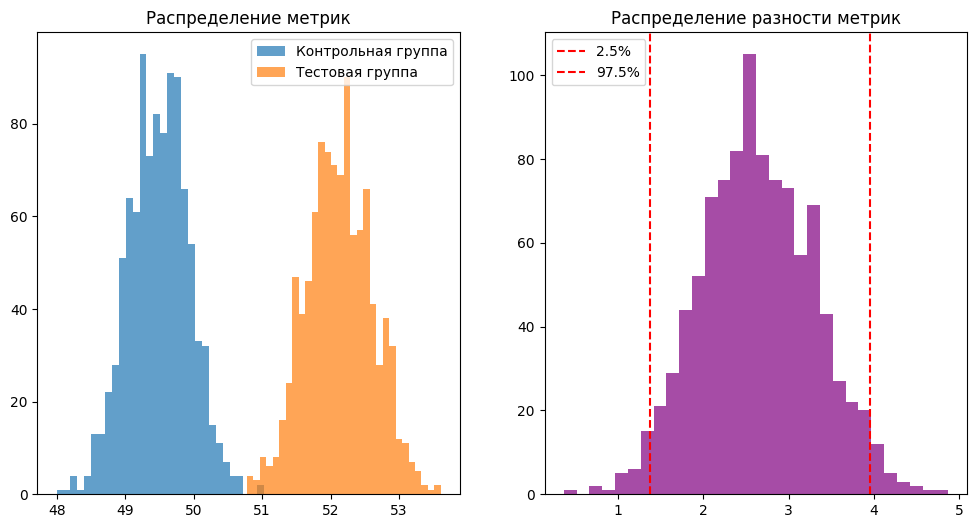

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# Подготовка данных
# Примерные данные: контрольная и тестовая группы
np.random.seed(42)
control_group = np.random.normal(loc=50, scale=5, size=100)  # контрольная группа
test_group = np.random.normal(loc=52, scale=5, size=100)     # тестовая группа

# Генерация Bootstrap-выборок
def bootstrap_samples(data, n_samples=1000):
    return np.random.choice(data, size=(n_samples, len(data)), replace=True)

control_bootstrap = bootstrap_samples(control_group)
test_bootstrap = bootstrap_samples(test_group)

# Расчет метрик для каждой выборки
def calculate_metric(samples, metric=np.mean):
    return np.apply_along_axis(metric, axis=1, arr=samples)

control_metrics = calculate_metric(control_bootstrap)
test_metrics = calculate_metric(test_bootstrap)

# Оценка распределения разности метрик
diff_metrics = test_metrics - control_metrics

# Оценка доверительных интервалов
conf_interval = np.percentile(diff_metrics, [2.5, 97.5])

print(f"95% доверительный интервал разности метрик: {conf_interval}")

# Сформулируйте гипотезы
p_value = (np.sum(diff_metrics <= 0) / len(diff_metrics))
print(f"p-значение: {p_value}")

# Интерпретация результатов
# Визуализация
plt.figure(figsize=(12, 6))

# Гистограммы распределения метрик
plt.subplot(1, 2, 1)
plt.hist(control_metrics, bins=30, alpha=0.7, label='Контрольная группа')
plt.hist(test_metrics, bins=30, alpha=0.7, label='Тестовая группа')
plt.title('Распределение метрик')
plt.legend()

# Гистограмма разности метрик
plt.subplot(1, 2, 2)
plt.hist(diff_metrics, bins=30, alpha=0.7, color='purple')
plt.title('Распределение разности метрик')
plt.axvline(conf_interval[0], color='red', linestyle='--', label='2.5%')
plt.axvline(conf_interval[1], color='red', linestyle='--', label='97.5%')
plt.legend()

plt.show()


## Часть 2

В рамках ответа также требуется ответить на следующие подвопросы:

 - Какие преимущества дает использование метода Bootstrap?
 - С какими метриками можно оперировать при использовании Bootstrap метода?
 - Какого размера должны быть bootstrap семплы?
 - Допустимо ли повторное использование одного и того же значения из исходной выборки в одном Bootstrap-семпле?

### Преимущества использования метода Bootstrap:

1. Простота и универсальность:

Метод не требует предположений о распределении данных, что делает его подходящим для анализа сложных или асимметричных выборок.

2. Оценка статистической точности:

Bootstrap позволяет вычислять доверительные интервалы, стандартные ошибки и тестировать гипотезы, даже если аналитические формулы отсутствуют.

3. Адаптация к небольшим выборкам:

Подходит для анализа, когда данных недостаточно для применения традиционных статистических методов.

4. Гибкость в работе с метриками:

Метод может быть использован для медианы, разницы средних, коэффициентов корреляции, мода или квантильные оценки и других статистик, а не всегда используем среднее.

5. Легкость реализации:

Метод прост в реализации с использованием современных языков программирования, таких как Python, и библиотек для обработки данных.

6. Меньшая зависимость от ошибок выборки:

Генерация выборок с возвратом помогает компенсировать ошибки, вызванные аномалиями или пропусками.

#### Пример: рализация Botstrap. Для удобство реализации была использована библиотека numpy

Среднее: 50.42
95% доверительный интервал: (np.float64(48.28319263969202), np.float64(52.59421805785805))


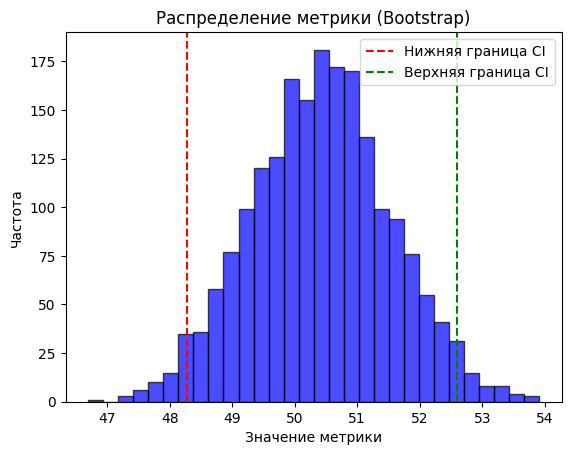

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def bootstrap(data, metric_func, n_bootstrap=1000, ci=95):
    """
    Реализация Bootstrap метода.
    
    Параметры:
    - data: массив данных.
    - metric_func: функция для расчета метрики (например, np.mean, np.median).
    - n_bootstrap: количество Bootstrap-выборок (по умолчанию 1000).
    - ci: доверительный интервал в процентах (по умолчанию 95%).
    
    Возвращает:
    - метрику для каждой выборки,
    - доверительный интервал.
    """
    n = len(data)
    bootstrap_metrics = []

    # Генерация Bootstrap-выборок и расчет метрики
    for _ in range(n_bootstrap):
        bootstrap_sample = np.random.choice(data, size=n, replace=True)  # выборка с возвращением
        metric_value = metric_func(bootstrap_sample)
        bootstrap_metrics.append(metric_value)
    
    # Вычисление доверительных интервалов
    lower_bound = np.percentile(bootstrap_metrics, (100 - ci) / 2)
    upper_bound = np.percentile(bootstrap_metrics, 100 - (100 - ci) / 2)
    
    return bootstrap_metrics, (lower_bound, upper_bound)

# Пример использования
if __name__ == "__main__":
    # Пример данных
    data = np.random.normal(50, 10, size=100)  # Случайные данные из нормального распределения
    
    # Рассчитаем среднее и 95% доверительный интервал
    metrics, conf_interval = bootstrap(data, np.mean, n_bootstrap=2000, ci=95)
    
    print(f"Среднее: {np.mean(data):.2f}")
    print(f"95% доверительный интервал: {conf_interval}")
    
    # Визуализация результатов
    plt.hist(metrics, bins=30, alpha=0.7, color='blue', edgecolor='black')
    plt.title("Распределение метрики (Bootstrap)")
    plt.axvline(conf_interval[0], color='red', linestyle='--', label='Нижняя граница CI')
    plt.axvline(conf_interval[1], color='green', linestyle='--', label='Верхняя граница CI')
    plt.xlabel("Значение метрики")
    plt.ylabel("Частота")
    plt.legend()
    plt.show()


### Метриками с которыми можно оперироваться при использовании Bootstrap метода

1. Среднее значение (Mean):

Используется для оценки центральной тенденции.

2. Медиана (Median):

Подходит для данных с выбросами или асимметричным распределением.

3. Перцентили (Percentiles):

Например, 10-й или 90-й перцентиль для анализа крайних значений.

4. Разница средних или медиан:

Применяется для сравнения двух групп (контрольной и тестовой).

5. Дисперсия (Variance) и стандартное отклонение (Standard Deviation):

Для анализа разброса данных.

6. Коэффициенты корреляции (Correlation coefficients):

Для анализа связи между переменными.

7. Коэффициенты регрессии:

Для оценки влияния независимых переменных в регрессионных моделях.

8. Метрики производительности:

Например, конверсии, точность, полнота в задачах машинного обучения.

#### Пример: оценки среднего значения данных и его доверительного интервала с использованием метода Bootstrap

Среднее значение выборки: 48.96
95% доверительный интервал: (47.14, 50.67)


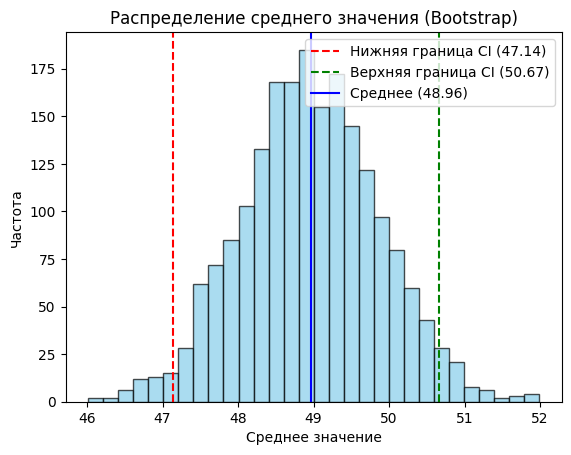

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bootstrap

# Пример данных
np.random.seed(42)  # Для воспроизводимости
data = np.random.normal(loc=50, scale=10, size=100)  # Среднее 50, стандартное отклонение 10

# Используем встроенный метод bootstrap из scipy
res = bootstrap((data,), np.mean, confidence_level=0.95, n_resamples=2000, method='percentile')

# Результаты
mean_value = np.mean(data)
conf_interval = res.confidence_interval

print(f"Среднее значение выборки: {mean_value:.2f}")
print(f"95% доверительный интервал: ({conf_interval.low:.2f}, {conf_interval.high:.2f})")

# Визуализация
plt.hist([np.mean(np.random.choice(data, size=len(data), replace=True)) for _ in range(2000)], 
         bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(conf_interval.low, color='red', linestyle='--', label=f'Нижняя граница CI ({conf_interval.low:.2f})')
plt.axvline(conf_interval.high, color='green', linestyle='--', label=f'Верхняя граница CI ({conf_interval.high:.2f})')
plt.axvline(mean_value, color='blue', linestyle='-', label=f'Среднее ({mean_value:.2f})')
plt.title("Распределение среднего значения (Bootstrap)")
plt.xlabel("Среднее значение")
plt.ylabel("Частота")
plt.legend()
plt.show()


### Размера должны быть bootstrap семплы

Каждый Bootstrap-семпл нужно делать такого же размера, как и исходная выборка. То есть, если у тебя в данных 9 объектов, то и в семпле их должно быть ровно 9. Это важно, чтобы правильно воссоздать распределение статистик, которые рассчитываются на основе этих данных. Если размер будет другим, распределение может исказиться, и результаты окажутся не совсем корректными.

In [13]:
import numpy as np

# Исходные данные
data = [5, 10, 15, 20, 25, 30, 35, 40, 45]

# Количество Bootstrap-выборок
num_samples = 1000

# Генерация Bootstrap-выборок
bootstrap_samples = [np.random.choice(data, size=len(data), replace=True) for _ in range(num_samples)]

# Пример расчёта статистики, например, среднего значения для каждой выборки
bootstrap_means = [np.mean(sample) for sample in bootstrap_samples]

# Вывод первых нескольких выборок и их средних значений
print("Пример выборок:")
for i, sample in enumerate(bootstrap_samples[:3], 1):
    print(f"Выборка {i}: {sample}, Среднее: {np.mean(sample):.2f}")

# Вывод итогового распределения средних значений
print("\nПример распределения средних значений (первые 10):", bootstrap_means[:10])


Пример выборок:
Выборка 1: [45  5 30  5 20 30 25 25 40], Среднее: 25.00
Выборка 2: [35 25  5 15 35 20 25 40 45], Среднее: 27.22
Выборка 3: [35 20 35 25  5 40 20 15 40], Среднее: 26.11

Пример распределения средних значений (первые 10): [np.float64(25.0), np.float64(27.22222222222222), np.float64(26.11111111111111), np.float64(32.22222222222222), np.float64(19.444444444444443), np.float64(28.88888888888889), np.float64(24.444444444444443), np.float64(28.88888888888889), np.float64(20.0), np.float64(25.555555555555557)]


### Допустимо ли повторное использование одного и того же значения из исходной выборки в одном Bootstrap-семпле?

Да, допустимо. Bootstrap-выборки создаются с возвратом, что означает, что одно и то же значение может быть включено в выборку несколько раз. Это ключевой аспект метода, позволяющий оценивать распределение статистики на основе случайного повторения элементов.

In [14]:
import numpy as np

# Исходные данные
data = [10, 20, 30, 40, 50]

# Количество Bootstrap-выборок
num_samples = 5

# Генерация Bootstrap-выборок с возвратом
bootstrap_samples = [np.random.choice(data, size=len(data), replace=True) for _ in range(num_samples)]

# Печать Bootstrap-выборок
print("Bootstrap-выборки:")
for i, sample in enumerate(bootstrap_samples, 1):
    print(f"Выборка {i}: {sample}")

# Пример подсчета статистики (например, среднее значение для каждой выборки)
bootstrap_means = [np.mean(sample) for sample in bootstrap_samples]

print("\nСредние значения Bootstrap-выборок:")
for i, mean in enumerate(bootstrap_means, 1):
    print(f"Выборка {i}: Среднее = {mean:.2f}")


Bootstrap-выборки:
Выборка 1: [50 40 40 30 40]
Выборка 2: [50 40 50 40 50]
Выборка 3: [40 40 20 50 20]
Выборка 4: [40 20 30 20 10]
Выборка 5: [30 50 40 40 40]

Средние значения Bootstrap-выборок:
Выборка 1: Среднее = 40.00
Выборка 2: Среднее = 46.00
Выборка 3: Среднее = 34.00
Выборка 4: Среднее = 24.00
Выборка 5: Среднее = 40.00
